In [31]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [32]:
dataset_fp = os.path.join(os.getcwd(), 'Datasets')

# reading in dataset
housing = pd.read_csv(os.path.join(dataset_fp, 'housing.csv'))
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422


In [33]:
# ## Exploratory EDA
# corr = housing.corr()
# plt.figure(figsize=(10,5))
# sns.heatmap(corr, 
#         xticklabels=corr.columns,
#         yticklabels=corr.columns)

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

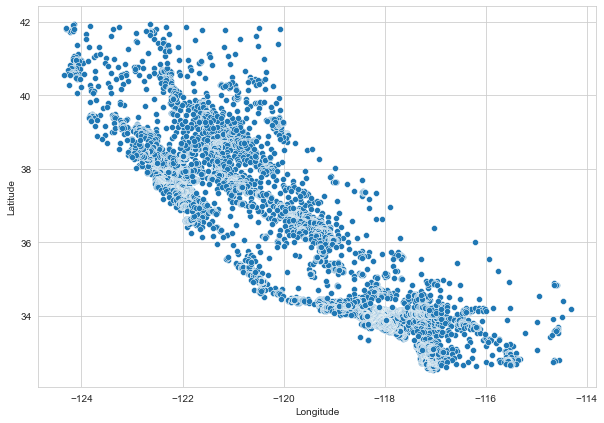

In [34]:
plt.figure(figsize=(10,7))
plt.grid(True)
sns.scatterplot(x='Longitude', y='Latitude', data=housing)

## K-Means Clustering Model

Functions needed:
1. Initialise clustering points
2. Calculating euclidean distance to each cluster point
3. Identifying the closest cluster point
4. Creating clusters of data
5. Calculate the mean value of each cluster of data
6. Optimization (convergence, lowest variance, gradient descent)

In [35]:
def initialize_cluster_points(data, K):
    # returns array of length K with indices of cluster points
    random_sample_idx = np.random.choice(range(len(data)), K, replace=False)
    return random_sample_idx

In [36]:
def euclidean_distance(data_point, cluster_point):
    delta_x = (cluster_point[0] - data_point[0])**2
    delta_y = (cluster_point[1] - data_point[1])**2
    distance = np.sqrt(delta_x + delta_y)
    return distance

In [37]:
# looping through the cluster_points occurs in this function

def closest_cluster_point(data_point, cluster_points):
    # empty list to store euclidean distance from each cluster point
    distances = []
    
    # Calculating the euclidean distance from each cluster point
    for c in cluster_points:
        distance = euclidean_distance(data_point, c)
        distances.append(distance)
    
    # Taking the index of the minimum euclidean distance to give the index of nearest cluster point
    closest_idx = np.argmin(distances)
    
    return closest_idx

In [38]:
# looping through the datapoints occurs here - since closest cluster is a subordinated function its loop occurs within the 
# loop in this function (i.e. for each data point loop through each cluster point and find the euclidean distance)

def create_clusters(cluster_points, data, K):
    # creating an empty list for each cluster point
    clusters = [[] for i in range(K)]
    
    # looping through data
    for i, v in enumerate(data):
        # finding the index of the nearest cluster point
        closest_idx = closest_cluster_point(v, cluster_points)
        
        # storing the index of each data point in the cluster list with the same index (in clusters) as the cluster point
        clusters[closest_idx].append(i)
    
    return clusters

In [39]:
## Need to adjust the below - clusters is a list of lists, in which each individual list contains the indexes of a cluster of 
## data points. So we need to use these indexes to subset the original data (a list of pairs) and find the mean x and y values 
## to create new cluster points

## Clusters is a list of K lists, with each internal list containing the indexes of all the data points in a given cluster

In [40]:
def cluster_point_mean(clusters, cluster_points, data, K):
    # finding the mean value of each cluster point - input is clusters list from above - (indices of data points grouped by cluster point)
    new_cluster_x_values = []
    new_cluster_y_values = []
    
    for i,c in enumerate(clusters):
        cluster_x_values= [data[x][0] for x in c]
        cluster_y_values= [data[x][1] for x in c]
        new_cluster_x = np.mean(cluster_x_values)
        new_cluster_y = np.mean(cluster_y_values)
        new_cluster_x_values.append(new_cluster_x)
        new_cluster_y_values.append(new_cluster_y)
    
    new_cluster_points = list(zip(new_cluster_x_values, new_cluster_y_values))
    old_cluster_points = cluster_points.copy()
    
    return new_cluster_points, old_cluster_points

In [41]:
def divergence(new_cluster_points, old_cluster_points):
    
    distances = []
    
    for i in range(len(old_cluster_points)):
        distance = euclidean_distance(new_cluster_points[i], old_cluster_points[i])
        distances.append(distance)
    
    divergence = sum(distances)
        
    return divergence

In [42]:
def variance(cluster_points, clusters, data):

    total_variances = []
    
    for i,c in enumerate(clusters):
        cluster_x_values= [data[x][0] for x in c]
        cluster_y_values= [data[x][1] for x in c]
        cluster_values = list(zip(cluster_x_values, cluster_y_values))
        variances = []
        for v in cluster_values:
            variance = euclidean_distance(cluster_points[i], v)
            variances.append(variance)
        
        total_variances.append(sum(variances))
    
    total_variance = sum(total_variances)
    return total_variance

In [45]:
def kmean_cluster_model(x_values, y_values, K, trials):
    
    # creating a single array
    model_data = list(zip(x_values, y_values))
    
    # random sampling to get indexes of first cluster points
    random_sample_idx = initialize_cluster_points(model_data, K)
    cluster_points = [model_data[i] for i in random_sample_idx]
    print('These are your initial cluster points')
    print(cluster_points)
    print('-----')
    
    # trial divergence/convergence data
    divergence_data = []
    
    # trial variance data
    variance_data = []

    # loop through number of trials
    for i in list(range(0, trials)):
        print('Trial ' + str(i))
        
        # Find nearest cluster point, Create clusters
        clusters = create_clusters(cluster_points, model_data, K)
        print('These are your input cluster points for this trial: ')
        print(cluster_points)
        print('')
        
        # Finding total variance from input cluster points
        total_variance = variance(cluster_points, clusters, model_data)
        variance_data.append(total_variance)
        print('The total variance from these input cluster points is ' + str(total_variance))
        print('')
        
        # Finding new cluster points
        cluster_points, old_cluster_points = cluster_point_mean(clusters, cluster_points, model_data, K)
        print('These are your output cluster points for this trial')
        print(cluster_points)
        print('-----')
        
        # Finding total variance for given values of cluster points
        total_divergence = divergence(cluster_points, old_cluster_points)
        divergence_data.append(total_divergence)
        
        # Checking for convergence
        if total_divergence == 0:
            print('Clustering is now complete. It took ' + str(i) + ' trials to establish the best cluster points.')
            break
    
    return cluster_points, clusters, divergence_data, variance_data

In [75]:
cluster_points, clusters, divergence_data, variance_data = kmean_cluster_model(housing['Latitude'], housing['Longitude'], 7, 100)

These are your initial cluster points
[(34.08, -118.0), (37.38, -120.64), (38.3, -122.45), (34.06, -118.26), (33.9, -118.1), (33.68, -117.97), (34.07, -118.34)]
-----
Trial 0
These are your input cluster points for this trial: 
[(34.08, -118.0), (37.38, -120.64), (38.3, -122.45), (34.06, -118.26), (33.9, -118.1), (33.68, -117.97), (34.07, -118.34)]

The total variance from these input cluster points is 14715.133103642811

These are your output cluster points for this trial
[(34.16941458733205, -117.64544625719769), (37.193992673992675, -120.57115384615385), (38.21133151300996, -122.12276903308707), (34.04907201187825, -118.23651818856719), (33.869001280409734, -118.12795774647887), (33.28596445221445, -117.30995337995338), (34.30018410555385, -118.70566431420681)]
-----
Trial 1
These are your input cluster points for this trial: 
[(34.16941458733205, -117.64544625719769), (37.193992673992675, -120.57115384615385), (38.21133151300996, -122.12276903308707), (34.04907201187825, -118.23651

These are your input cluster points for this trial: 
[(34.089266375545854, -117.1066113537118), (37.337726942628905, -120.24482207697893), (38.1329501754386, -122.03939368421054), (34.094656201636084, -118.38586115410126), (33.86717168924523, -117.94047553220902), (32.86795545402627, -116.98620217018845), (35.42523593466425, -119.62889292196006)]

The total variance from these input cluster points is 11131.585018873795

These are your output cluster points for this trial
[(34.087902097902095, -117.1060576923077), (37.35596363636363, -120.2633018181818), (38.133008438818564, -122.04166385372716), (34.09643637174058, -118.38812123913527), (33.86849330051955, -117.94284933005196), (32.86795545402627, -116.98620217018845), (35.44385304659498, -119.62702508960574)]
-----
Trial 12
These are your input cluster points for this trial: 
[(34.087902097902095, -117.1060576923077), (37.35596363636363, -120.2633018181818), (38.133008438818564, -122.04166385372716), (34.09643637174058, -118.388121239

These are your input cluster points for this trial: 
[(34.087956331877734, -117.10646288209607), (37.38400292184076, -120.36202337472606), (38.14307965355672, -122.04709356808179), (34.09852410995944, -118.39076836412798), (33.86932020501754, -117.94635824116537), (32.86795545402627, -116.98620217018845), (35.514650379106996, -119.62113732097725)]

The total variance from these input cluster points is 11142.684508726577

These are your output cluster points for this trial
[(34.087956331877734, -117.10646288209607), (37.38400292184076, -120.36202337472606), (38.14307965355672, -122.04709356808179), (34.09852410995944, -118.39076836412798), (33.86932020501754, -117.94635824116537), (32.86795545402627, -116.98620217018845), (35.514650379106996, -119.62113732097725)]
-----
Clustering is now complete. It took 22 trials to establish the best cluster points.


In [76]:
housing['LatLon Cluster'] = np.nan

for i in range(len(clusters)):
    housing['LatLon Cluster'] = np.where(housing.index.isin(clusters[i]), i, housing['LatLon Cluster'])

housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,LatLon Cluster
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526,2.0
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585,2.0
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521,2.0
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413,2.0
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422,2.0


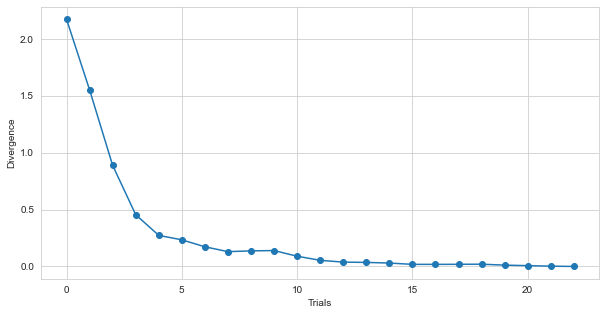

In [77]:
x_values = range(len(divergence_data))
y_values = divergence_data

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.xlabel('Trials')
plt.ylabel('Divergence')
plt.plot(x_values, y_values, marker = 'o')

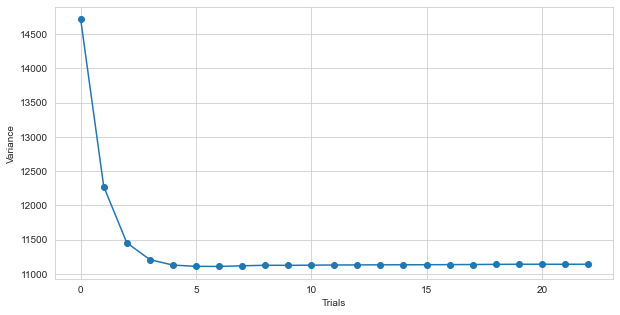

In [78]:
x_values = range(len(variance_data))
y_values = variance_data

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.xlabel('Trials')
plt.ylabel('Variance')
plt.plot(x_values, y_values, marker = 'o')

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

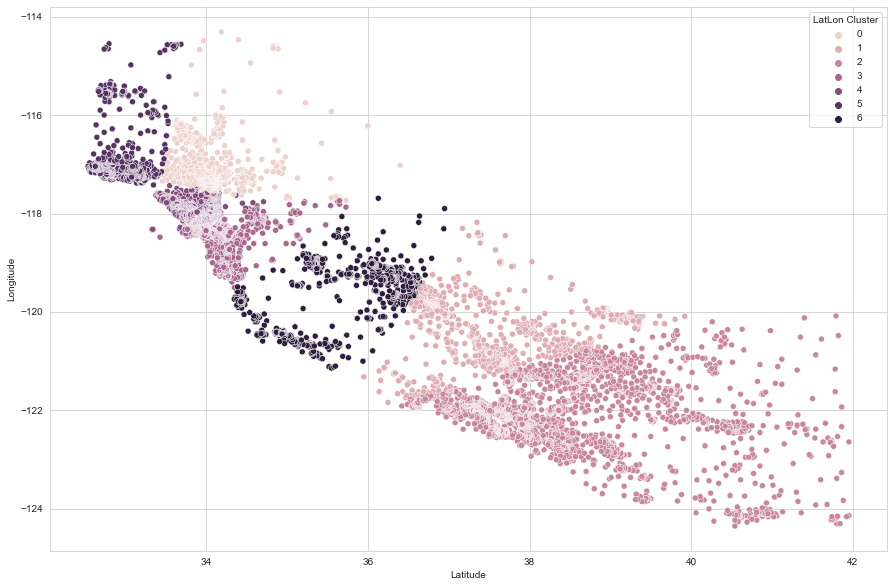

In [79]:
plt.figure(figsize=(15,10))
plt.grid(True)
sns.scatterplot(data=housing, x='Latitude', y='Longitude', hue='LatLon Cluster')

In [66]:
## Post cluster analysis
## - if we segment the data using these clusters, what can we find out about the respective groups

In [67]:
# next steps
# 1. Add a plot function returning 
## a. the clusters and the cluster points used for those clusters (scatter plot)
## b. the total variance